# Import Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = (128, 128)

In [ ]:
train_data_dir = "/content/drive/MyDrive/4th year project/Help Projects/Cat Dog/train"
test_data_dir = "/content/drive/MyDrive/4th year project/Help Projects/Cat Dog/test"

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='training',
                                                         validation_split=0.1,
                                                         seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='validation',
                                                         validation_split=0.1,
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)



Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [ ]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

In [ ]:
for image_batch, label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


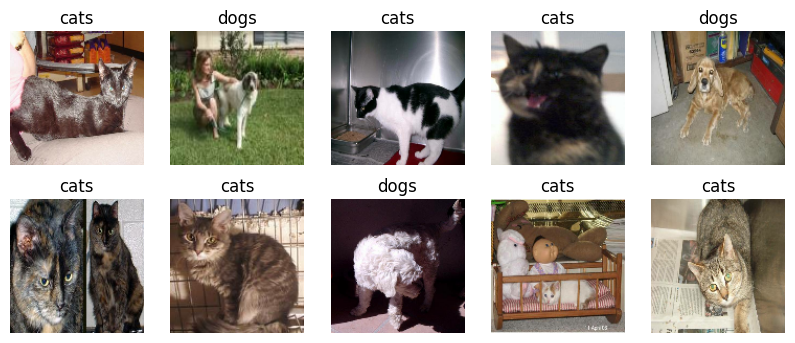

In [ ]:
# plot data sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
  for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis("off")

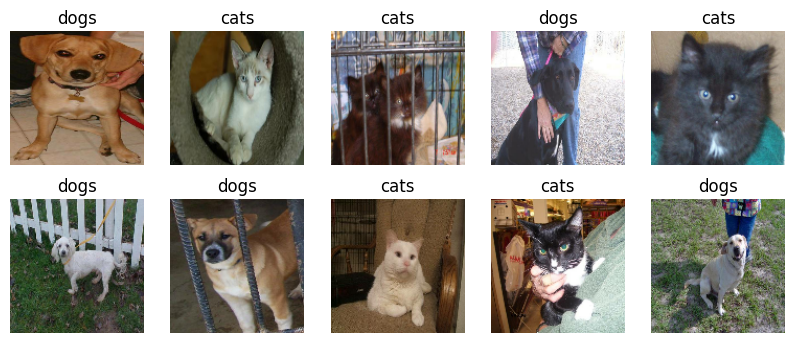

In [ ]:
plt.figure(figsize=(10,4))
for image,label in test_data.take(1):
  for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis("off")

# Feature Scalling

### Before Feature Scalling Image

In [ ]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[101.00769   104.00769   109.00769  ]
   [111.074585  112.71521   114.30505  ]
   [117.635284  115.31354   112.59396  ]
   ...
   [129.86246   132.91324   136.22964  ]
   [126.8725    133.10297   135.69281  ]
   [128.9002    138.99207   139.94614  ]]

  [[ 85.20029    88.20029    93.20029  ]
   [ 99.3725     99.79227   101.78906  ]
   [114.00287   112.997925  110.048706 ]
   ...
   [116.720825  120.720825  123.720825 ]
   [119.9389    126.16937   128.75922  ]
   [138.79547   147.0824    148.93893  ]]

  [[ 92.54297    94.90234    99.58203  ]
   [ 91.57605    91.986206   93.986206 ]
   [105.38388   104.38388   101.75107  ]
   ...
   [120.73743   125.52237   128.52237  ]
   [130.21445   135.21445   138.21445  ]
   [127.32648   134.36554   136.68585  ]]

  ...

  [[118.07504   122.07504   125.07504  ]
   [121.617584  125.617584  128.61758  ]
   [130.54602   134.54602   137.54602  ]
   ...
   [ 81.51825    87.02301    96.76108  ]
   [ 45.951294   50.819916   54.147003 ]
   [ 

In [ ]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

### After Feature Scalling Image

In [ ]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.15117954 0.08451287 0.12372855]
   [0.1564951  0.08982843 0.12904412]
   [0.14387254 0.07720588 0.11642157]
   ...
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.15078124 0.08411458 0.12333027]
   [0.1463848  0.07971814 0.11893383]
   [0.13852635 0.07185968 0.11107536]
   ...
   [0.         0.         0.        ]
   [0.         0.00127145 0.        ]
   [0.         0.         0.        ]]

  [[0.15681386 0.09014719 0.12936288]
   [0.15010071 0.08343404 0.12264973]
   [0.1491728  0.08250613 0.12172181]
   ...
   [0.00392157 0.         0.        ]
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.7237403  0.6738876  0.726761  ]
   [0.7528033  0.7035823  0.75956535]
   [0.77319306 0.71951526 0.7698836 ]
   ...
   [0.04705882 0.00392157 0.03529412]
   [0.05098039 0.         0.03529412]
   [0.0395804  0.         0.03137255]]

  [[0.7596398  0.66668636 0.694030

# Data Augmentation

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(128, 128, 3)),
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.2)

    ]
)

# Model Architecture

In [ ]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(23, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_9 (Sequential)            │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 23)                  │           2,967 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              24 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,324,655 (12.68 MB)

 Trainable params: 3,324,399 (12.68 MB)

 Non-trainable params: 256 (1.00 KB)

# Compile Model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Train Model

In [ ]:
start_time = time.time()
history = model.fit(train_data,
                    epochs=20,
                    validation_data=validation_data)
end_time = time.time()

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 31s 126ms/step - accuracy: 0.5568 - loss: 0.7053 - val_accuracy: 0.5825 - val_loss: 0.6531
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 126ms/step - accuracy: 0.6096 - loss: 0.6560 - val_accuracy: 0.5775 - val_loss: 0.6591
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 124ms/step - accuracy: 0.6328 - loss: 0.6422 - val_accuracy: 0.5650 - val_loss: 0.6951
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 28s 126ms/step - accuracy: 0.6431 - loss: 0.6257 - val_accuracy: 0.6587 - val_loss: 0.6153
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 128ms/step - accuracy: 0.6693 - loss: 0.6028 - val_accuracy: 0.6438 - val_loss: 0.6996
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 40s 123ms/step - accuracy: 0.6831 - loss: 0.5897 - val_accuracy: 0.7088 - val_loss: 0.6270
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 31s 136ms/step - accuracy: 0.7029 - loss: 0.5744 - val_accuracy: 0.7100 - val_loss: 0.5602
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 38s 123ms/step - accuracy: 0.7091 - loss: 0

In [ ]:
history.history

{'accuracy': [0.5731944441795349,
  0.6088888645172119,
  0.6386111378669739,
  0.6584722399711609,
  0.6733333468437195,
  0.6812499761581421,
  0.7072222232818604,
  0.7118055820465088,
  0.726527750492096,
  0.7347221970558167,
  0.7412499785423279,
  0.7527777552604675,
  0.7594444155693054,
  0.7641666531562805,
  0.773194432258606,
  0.7677778005599976,
  0.7795833349227905,
  0.7888888716697693,
  0.7968055605888367,
  0.7916666865348816],
 'loss': [0.6827074289321899,
  0.6548681259155273,
  0.6338669061660767,
  0.6165865063667297,
  0.5975860357284546,
  0.5860151052474976,
  0.5713480114936829,
  0.5562785863876343,
  0.538405179977417,
  0.526945948600769,
  0.5148470401763916,
  0.5086280703544617,
  0.4897765517234802,
  0.4847761392593384,
  0.4687773287296295,
  0.4742405116558075,
  0.45183050632476807,
  0.4496779143810272,
  0.4365631639957428,
  0.42748090624809265],
 'val_accuracy': [0.5824999809265137,
  0.5774999856948853,
  0.5649999976158142,
  0.65874999761581

# Plot Accuracy

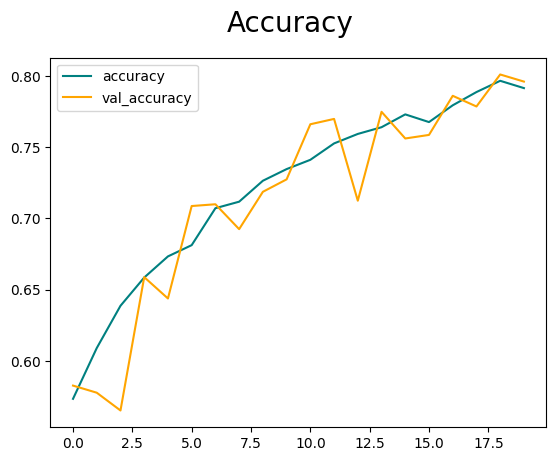

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

# Plot Loss

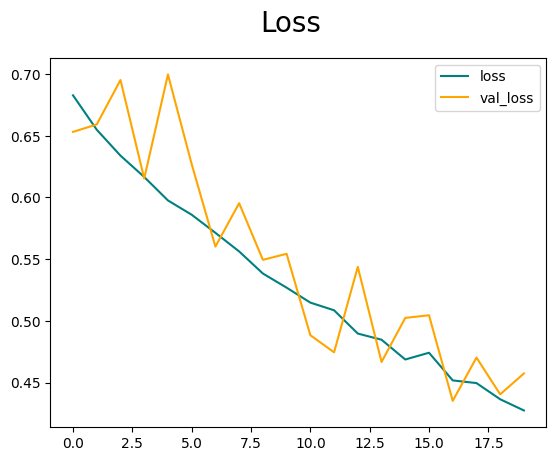

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

# Evaluate Model

In [ ]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [ ]:
for batch in test_data.as_numpy_iterator():
  x , y =batch
  yhat = model.predict(x)
  precision.update_state(y, yhat)
  recall.update_state(y, yhat)
  accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

In [ ]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7672101259231567>

In [ ]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.847000002861023>

In [ ]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7950000166893005>

# Using Our Model

In [ ]:
import cv2

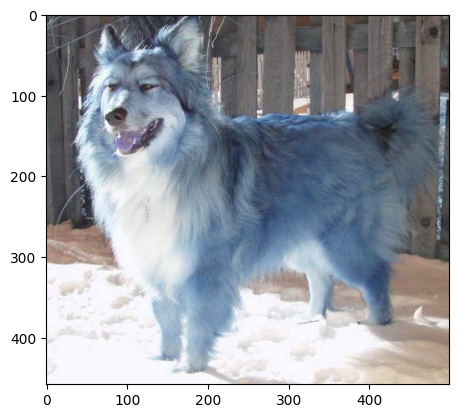

In [ ]:
img = cv2.imread("/content/drive/MyDrive/4th year project/Help Projects/Cat Dog/test/dogs/dog.4006.jpg")
plt.imshow(img)
plt.show()

In [ ]:
resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255.0

In [ ]:
scaled_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.29894817, 0.2767821 , 0.32423922],
        [0.30145958, 0.30810785, 0.34459683],
        [0.40949684, 0.42421803, 0.44382587],
        ...,
        [0.35964596, 0.31554362, 0.29985735],
        [0.5287866 , 0.5221383 , 0.506452  ],
        [0.4772899 , 0.4160154 , 0.41942772]],

       [[0.2983567 , 0.28180984, 0.3273939 ],
        [0.32762584, 0.34003943, 0.3753461 ],
        [0.2788707 , 0.29955646, 0.31916434],
        ...,
        [0.33804333, 0.29990557, 0.2842193 ],
        [0.43443352, 0.43290165, 0.41721538],
        [0.39644894, 0.36851197, 0.36698428]],

       [[0.28186992, 0.2773574 , 0.32089293],
        [0.64235526, 0.66681916, 0.69938654],
        [0.4524323 , 0.4848312 , 0.50148255],
        ...,
        [0.3258417 , 0.29834643, 0.27970365],
        [0.24040899, 0.25428358, 0.2360391 ],
        [0.26577497, 0.26321673, 0.25753352]],

       ...,

       [[0.9721201 , 0.97037375, 0.99041057],
        [0.97

In [ ]:
input_image = scaled_image.numpy()
input_image = np.expand_dims(input_image, axis=0)

In [ ]:
y_hat = model.predict(input_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


In [ ]:
y_hat

array([[0.6546865]], dtype=float32)

In [ ]:
class_names

['cats', 'dogs']

In [ ]:
if y_hat >= 0.5:
  print(class_names[1])
else:
  print(class_names[0])

dogs


In [ ]:
import pickle

model_save_path = '/content/drive/MyDrive/4th year project/Help Projects/Cat Dog/CNN_cat_dog_Classification.pickle'

with open(model_save_path, 'wb') as file:
    pickle.dump(model, file)

# Using Transfer Learning

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = (128, 128)

In [ ]:
train_data_dir = "/content/drive/MyDrive/4th year project/Help Projects/Cat Dog/train"
test_data_dir = "/content/drive/MyDrive/4th year project/Help Projects/Cat Dog/test"

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='training',
                                                         validation_split=0.1,
                                                         seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='validation',
                                                         validation_split=0.1,
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [ ]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

In [ ]:
for image_batch, label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


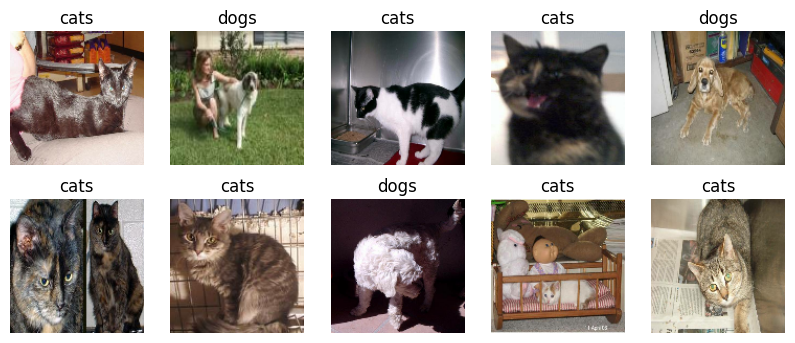

In [ ]:
# plot data sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
  for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis("off")

In [ ]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

#### Transfer Learning

In [ ]:
pretrained_model = tf.keras.applications.xception.Xception(include_top=False,
                                                           input_shape=(128,128,3),
                                                           weights = "imagenet",
                                                           pooling='max')

for layer in pretrained_model.layers:
  layer.trainable=False

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
model = tf.keras.models.Sequential()

model.add(pretrained_model)

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 2048)                │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,144,425 (80.66 MB)

 Trainable params: 282,945 (1.08 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Model Training

In [ ]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=1,
                    validation_data=validation_data)

end_time = time.time()

225/225 ━━━━━━━━━━━━━━━━━━━━ 3352s 15s/step - accuracy: 0.9362 - loss: 0.1628 - val_accuracy: 0.9563 - val_loss: 0.1084


In [ ]:
print(f'Total time for training {(end_time-start_time):.3f} Seconds')

# Advantage Using Pretrain Model

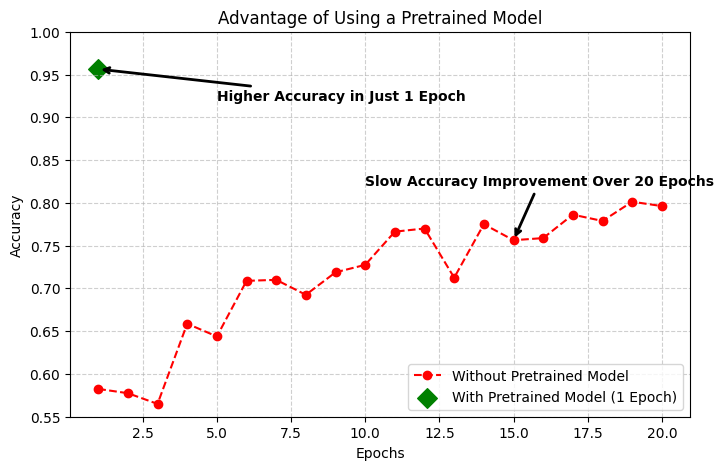

In [ ]:
import matplotlib.pyplot as plt

epochs_before = list(range(1, 21))
accuracy_before = [
    0.5825, 0.5775, 0.5650, 0.6587, 0.6438, 0.7088, 0.7100, 0.6925, 0.7188, 0.7275,
    0.7663, 0.7700, 0.7125, 0.7750, 0.7563, 0.7588, 0.7862, 0.7788, 0.8013, 0.7962
]


epochs_after = [1]
accuracy_after = [0.9563]




# Plot
plt.figure(figsize=(8, 5))
plt.plot(epochs_before, accuracy_before, label="Without Pretrained Model", linestyle="--", marker="o", color="red")
plt.scatter(epochs_after, accuracy_after, label="With Pretrained Model (1 Epoch)", color="green", s=100, marker="D")

# Annotate the improvement
plt.annotate("Higher Accuracy in Just 1 Epoch", xy=(1, 0.9563), xytext=(5, 0.92),
             arrowprops=dict(arrowstyle="->", color="black", lw=2),
             fontsize=10, color="black", fontweight="bold")

plt.annotate("Slow Accuracy Improvement Over 20 Epochs", xy=(15, accuracy_before[14]), xytext=(10, 0.82),
             arrowprops=dict(arrowstyle="->", color="black", lw=2),
             fontsize=10, color="black", fontweight="bold")

# Labels and title
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Advantage of Using a Pretrained Model")
plt.ylim(0.55, 1.0)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()